<a href="https://colab.research.google.com/github/yuna1998/statistic-class/blob/main/classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers

In [2]:
layer = layers.Dense(32, input_shape = (784,))

A dense layer with 32 outputs units

In [3]:
from keras import models

In [4]:
from keras import layers

In [6]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape = (784,)))
model.add(layers.Dense(32))

Shape of incoming layers automatically mathced with the previous layer

we dont's need to describe input_shape in the second layer.

#Loss function
The quantitiy that will be minimized during training. 
Typically using maximum likelihood

#Optimizer
Determines how the network will be updated based on the loss function (Ex. SGD)

Use Binary corss entropy for a two-class classification problem.
Catergorical cross entropy for a many-class classification porblem mean squared error for a regression problem

# Classifying movie reviews : a binary classification example

**The IMDB dataset**

- 50,000 highly poloarized reviews
- 25,000 reviews for training and 25,000 reviews for testing
- Each set consisting 0f 50% negative and 50% positive reviews


In [12]:
from tensorflow.keras.datasets import imdb

In [13]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [14]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # reverse it, mapping integer indices to word

decoded_review = " ".join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])
#decode the review. note that the indices are offset by 3 b/c 0,1,2 are reserved indices for "padding","start of sequence","unkown"

In [15]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [16]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [17]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [18]:
import numpy as np

In [19]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension)) #Creates an all-zero matrix of shape
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Sets sepecific indices of results[i] to 1s
    return results

In [21]:
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vecotorized test data

vectorize labels

In [23]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [24]:
from keras import models
from keras import layers

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [34]:
model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [35]:
from keras import optimizers

In [37]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.0001),
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [38]:
from keras import losses
from keras import metrics

In [40]:
model.compile(optimizer = optimizers.RMSprop (lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics = metrics.binary_accuracy)

In [41]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5765 - acc: 0.7264 - val_loss: 0.3751 - val_acc: 0.8733
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3178 - acc: 0.9034 - val_loss: 0.3005 - val_acc: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2238 - acc: 0.9269 - val_loss: 0.2773 - val_acc: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1725 - acc: 0.9447 - val_loss: 0.2815 - val_acc: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1323 - acc: 0.9600 - val_loss: 0.2852 - val_acc: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1132 - acc: 0.9668 - val_loss: 0.3004 - val_acc: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0902 - acc: 0.9732 - val_loss: 0.3131 - val_acc: 0.8846
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0746 - a

In [45]:
history_dict = history.history

In [46]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [47]:
import matplotlib.pyplot as plt

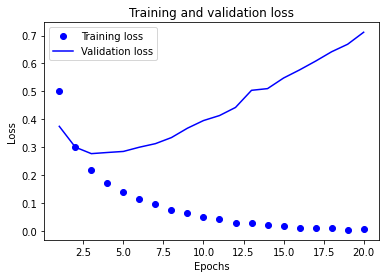

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
model= models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [57]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [59]:
model.fit(x_train, y_train, epochs=4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.5400 - acc: 0.7398
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2596 - acc: 0.9125
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1982 - acc: 0.9296
Epoch 4/4
49/49 [==============================] - 1s 24ms/step - loss: 0.1621 - acc: 0.9438


In [60]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2933 - acc: 0.8841


In [61]:
model.predict(x_test)

array([[0.21418568],
       [0.99986446],
       [0.7822174 ],
       ...,
       [0.1069262 ],
       [0.06874105],
       [0.54851127]], dtype=float32)